In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
file_name = './dice_jobs_list.csv'

In [4]:
df = pd.read_csv(file_name)

In [5]:
df.head()

,salary,crawled_at,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,raw_description,skills,latitude,_id,company,posted_at,source
0,Depends on Experience,"04/16/2021, 19:51:28","Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC","<div class=""highlight-black"" id=""jobdescSec"">\...",Azure AD,35.227085,6ea0725a-554f-5db9-8fa3-81b8eea3d9c6,"Nutech Systems, Inc.",2021-04-13T22:31:54Z,https://www.dice.com
1,Depends on Experience,"04/16/2021, 19:51:31",We are looking for a Ad Operations Associate f...,Ad Operations Associate,https://www.dice.com/jobs/detail/Ad-Operations...,NaN,IT Software,Contract W2,0.000000,USD,IT Diploma/Degree/Certification,NaN,NaN,"<div class=""highlight-black"" id=""jobdescSec"">\...","Account management, Advertising, Content marke...",0.000000,68afe519-ecca-5fe8-a553-2b4511d367e2,"Software Resources, Inc.",2021-04-12T16:31:29Z,https://www.dice.com
2,Depends on Experience,"04/16/2021, 19:51:34",Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","<div class=""highlight-black"" id=""jobdescSec"">\...","Campaign management, Media buying, Analytics, ...",37.630490,9221c243-e03a-5c7c-96f6-37d8edcd39a6,"Tranzeal, Inc.",2021-04-14T20:15:06Z,https://www.dice.com
3,Market,"04/16/2021, 19:51:37",Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","<div class=""highlight-black"" id=""jobdescSec"">\...","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,493b1cc2-3c1e-5cd4-bd3e-d4a6403b2501,"Software Management Consultants, Inc.",2021-04-01T01:05:06Z,https://www.dice.com
4,Market,"04/16/2021, 19:51:39",Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","<div class=""highlight-black"" id=""jobdescSec"">\...","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,34d5e29c-0645-5567-b4c1-2820abcc316f,"Software Management Consultants, Inc.",2021-04-10T01:05:17Z,https://www.dice.com


In [1]:
s#Cleaning the dataset

In [6]:
df = df.dropna()

In [9]:
df.shape

(7985, 20)

In [10]:
df1 = df.drop(['crawled_at', 'raw_description', '_id', 'source'], axis=1)

In [11]:
df1

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at
0,Depends on Experience,"Azure AD EngineerLocation: Charlotte, NCDurati...",Azure AD Engineer,https://www.dice.com/jobs/detail/Azure-AD-Engi...,US,IT Software,"Contract W2, Contract Independent",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",Azure AD,35.227085,"Nutech Systems, Inc.",2021-04-13T22:31:54Z
2,Depends on Experience,Job Title: Ad Operations Onsite AnalystLocatio...,Ad Operations Analyst,https://www.dice.com/jobs/detail/Ad-Operations...,US,IT Software,"Contract W2, Contract Independent",-122.411090,USD,IT Diploma/Degree/Certification,94066,"San Bruno, CA","Campaign management, Media buying, Analytics, ...",37.630490,"Tranzeal, Inc.",2021-04-14T20:15:06Z
3,Market,Job Description: This role is for a senior Pro...,"Project Manager - Ad Tech, Digital Business, A...",https://www.dice.com/jobs/detail/Project-Manag...,US,IT Software,Contract W2,-122.333220,USD,IT Diploma/Degree/Certification,98101,"Seattle, WA","Ad Tech, Digital Business, Agile, Sprints, Sma...",47.611330,"Software Management Consultants, Inc.",2021-04-01T01:05:06Z
4,Market,Job Description: IT Service Desk Support Analy...,"Technical Support - Salesforce, TCP/IP, DNS, W...",https://www.dice.com/jobs/detail/Technical-Sup...,US,IT Software,Contract W2,-82.342995,USD,IT Diploma/Degree/Certification,33601,"Tampa, FL","Salesforce, TCP/IP, DNS, WINS, AD, ServiceNow",27.981146,"Software Management Consultants, Inc.",2021-04-10T01:05:17Z
5,Depends on Experience,"Mandatory:· Sr level experience, Netwo...",AD/DNS Engineer,https://www.dice.com/jobs/detail/AD%26%2347DNS...,US,IT Software,"Contract W2, Contract Independent",-117.900290,USD,IT Diploma/Degree/Certification,92821,"Brea, CA","Active Directory, DNS, Networking, Routing, Su...",33.916473,The Proven Method,2021-04-08T19:45:59Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,Depends on Experience,"In partnership with ExxonMobil, Synthetic Geno...",Senior Software Engineer,https://www.dice.com/jobs/detail/Senior-Softwa...,US,IT Software,Full Time,-117.255850,USD,IT Diploma/Degree/Certification,92037,"La Jolla, CA","Amazon Web Services, Node.js, React.js, Angula...",32.828327,Synthetic Genomics,2021-04-06T20:06:55Z
9807,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,27601,"Raleigh, NC","AAA game engine experience, C/C++ programming,...",35.779590,"Concurrents, Inc",2021-04-09T15:17:11Z
9808,"$82,000 - $108,000","Headquarters: Bozeman, MontanaStart Date: Imme...",Senior .Net Cloud Developer,https://www.dice.com/jobs/detail/Senior-.Net-C...,US,IT Software,Full Time,-111.042930,USD,IT Diploma/Degree/Certification,59715,"Bozeman, MT",".NET, Attention to detail, C#, CSS, Collaborat...",45.677000,TEXbase Inc,2021-04-08T15:30:30Z
9811,Depends on Experience,"Yale University, conveniently located between ...",Senior Software Engineer,https://www.dice.com/jobs/detail/Senior-Softwa...,US,IT Software,Full Time,-72.927890,USD,IT Diploma/Degree/Certification,06501,"New Haven, CT","Sybase, MySQL, MongoDb, Elasticsearch",41.308273,Yale University,2021-04-06T17:45:36Z


In [12]:
df1 = df1.replace('', np.nan)

In [20]:
df1['state'] = df1['location'].str.split(',').str[-1].str.strip()
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Filter the dataset to include only job postings with a valid US state code
df1 = df1[df1['state'].isin(us_states)]

# Now data['states'].unique() should only contain valid US state codes
print(df1['state'].unique())

['NC' 'CA' 'WA' 'FL' 'TX' 'NY' 'NV' 'OK' 'CT' 'IL' 'MO' 'MT' 'KS' 'NJ'
 'AZ' 'VA' 'OH' 'PA' 'MD' 'MI' 'IN' 'SC' 'GA' 'MN' 'MA' 'CO' 'OR' 'AL'
 'UT' 'WI' 'KY' 'TN' 'MS' 'NM' 'LA' 'DE' 'ID' 'IA' 'ND' 'NE' 'AR' 'RI'
 'SD' 'NH' 'ME' 'HI' 'WV' 'VT']


In [26]:
region_map = {'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
              'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
              'South': ['AL', 'AR', 'DE', 'DC', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV'],
              'West': ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']}

In [30]:
def state_to_region(state):
    for region, states in region_map.items():
        if state in states:
            return region
    return None
# Create a new column 'region' by applying the state_to_region function to the 'state' column
df1['region'] = df1['state'].apply(state_to_region)

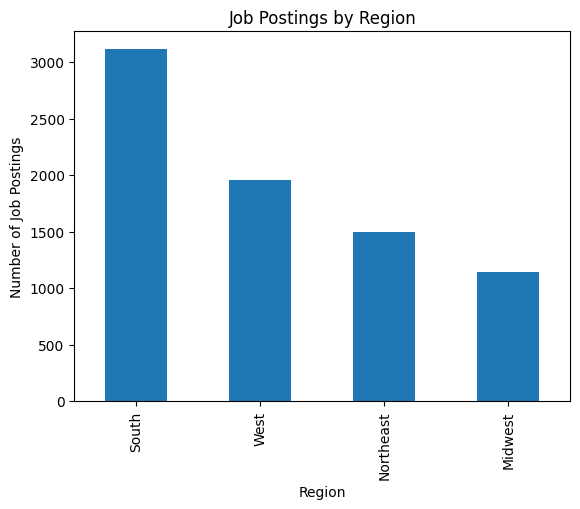

In [31]:
region_count = df1['region'].value_counts()
# Plot the bar graph of job postings by region
region_count.plot(kind='bar')
plt.title('Job Postings by Region')
plt.xlabel('Region')
plt.ylabel('Number of Job Postings')
plt.show()
#This code defines a dictionary of regions and their respective states. It then creates a new column called "region" by mapping each state to its respective region. It then counts the number of job postings by region and creates a bar graph showing the number of job postings in each region.


In [32]:
def calculate_skill_match(df1, skills):
    """
    Calculates the percentage match of the given skills with the 'skills' column in the given dataset.
    Returns a new dataframe with an additional column 'skill_match' that contains the percentage match
    for each job posting.
    """
    # Convert to set
    skills_set = set(skills)
    
    # Calculate the percentage match for each job posting
    skill_matches = []
    for job_skills in df1['skills']:
        # Split the 'skills' string 
        job_skills_set = set(job_skills.split(', '))
        # Calculate the percentage of matching skills
        match_percent = len(job_skills_set & skills_set) / len(skills_set) * 100
        skill_matches.append(match_percent)
    
    # Add the 'skill_match' column to the original df1frame
    df1_with_match = df1.copy()
    df1_with_match['skill_match'] = skill_matches
    
    # Return the new df1frame with the 'skill_match' column
    return df1_with_match

In [36]:
#testing skill fn
my_skills = ['Python', 'SQL', 'Node.js' , 'React.js']

# Call the function
matched_data = calculate_skill_match(df1, my_skills)

# top 20 job postings with the highest skill match percentage
top_matched = matched_data.nlargest(20, 'skill_match')
print(top_matched[['title', 'company', 'location', 'skill_match']])

                                                  title  \
1316                 Senior Software Engineer (.Net/C#)   
1342                    Full-stack Developer - C#, .NET   
2180  Sr Software Engineer - Behavioral Health Corpo...   
2187                      Senior Software Web Developer   
2481                      Full Stack Software Developer   
2555            Software Developer (No C2C/Sponsorship)   
2629                          Full stack Java Developer   
2958                                Full Stack Engineer   
3195                        Full Stack Node.JS Engineer   
3256                              Outsystems Consultant   
4776                          Senior Software Developer   
4850                          Senior Software Developer   
5106                       Python Software Engineer - G   
6562                           Cloud Software Developer   
6911                           Cloud Software Developer   
8716                                  Angular Developer 

In [40]:
df1['salary'].unique()

array(['Depends on Experience', 'Market', 'No Salary Listed', '$55 - $60',
       '$80,000 - $95,000', '$70,000 - $90,000', '$70 - $74',
       '$100,000 - $120,000', '$80,000 - $120,000', '$82,000 - $108,000',
       '$70,000 - $80,000', '$150,000 - $200,000', '$140,000+',
       '$100 - $120', '$100,000 - $140,000', 'COMPETITIVE',
       '$93,246.4 - $118,206.4', '$0 - $0', '$60,000 - $80,000',
       '$55,000 - $72,000', '$80,000 - $100,000', '$120,000 - $160,000',
       '$80,000+', '$70,000 - $120,000', '$74,233 - $103,926',
       'Depends On Experience', 'BASED ON EXPERIENCE',
       '$100,000 - $135,000', '$70,000+', '$40 - $45', '$50 - $100',
       '$65,580', '$open', '$30 - $43', '$60,000 - $100,000',
       '$80,000 - $90,000', '$72,000', '$105995 - $143405 per annum',
       '$85,900 - $85,900', 'Up to $60', '$100,000 - $150,000',
       '$60,000 - $85,000', '$85,000 - $110,000', '$85,000 - $125,000',
       '$90,000 - $105,000', '$110000 - $120000 per annum',
       '$110

In [50]:
dig = df1['salary'].str.contains('\d+')
# Remove rows that don't contain numbers in the 'salary' column
df_sal = df1.loc[dig]
df_sal

,salary,description,title,url,country,industry,job_type,longitude,currency,education_requirements,postal_code,location,skills,latitude,company,posted_at,state,region
10,$55 - $60,Title: .NET Core developerLocation: ...,.NET Core developer,https://www.dice.com/jobs/detail/.NET-Core-dev...,US,IT Software,"Contract W2, Contract Independent, Contract Co...",-80.843124,USD,IT Diploma/Degree/Certification,28201,"Charlotte, NC",".net, oauth, valet key, api, azure AD",35.227085,"Paramount Software Solutions, Inc",2021-04-12T14:45:43Z,NC,South
15,"$80,000 - $95,000",temT to hire-mix of work remote and at the off...,IT Systems Engineer,https://www.dice.com/jobs/detail/IT-Systems-En...,US,IT Software,Contract W2,-74.005974,USD,IT Diploma/Degree/Certification,10001,"New York City, NY","Net app, VMware, SQL, Azure Ad, InTune, Endpoi...",40.712776,Henderson Harbor Group,2021-04-07T17:45:31Z,NY,Northeast
16,"$70,000 - $90,000","Our client, a leading private equity client wi...","Senior Analyst, Help Desk",https://www.dice.com/jobs/detail/Senior-Analys...,US,IT Software,Full Time,-73.999160,USD,IT Diploma/Degree/Certification,10001,"New York, NY","Attention to detail, Business operations, CAN,...",40.753685,The Atlantic Group,2021-03-15T14:30:18Z,NY,Northeast
19,$70 - $74,Job Description:This position is responsible f...,Azure Cloud Security Engineer,https://www.dice.com/jobs/detail/Azure-Cloud-S...,US,IT Software,Contract W2,-87.629800,USD,IT Diploma/Degree/Certification,60290,"Chicago, IL","Microsoft Windows Azure, Windows PowerShell, A...",41.878113,ACG Tech Systems Inc.,2021-04-10T02:05:30Z,IL,Midwest
20,"$100,000 - $120,000",Applications DeveloperPlacement – Contract to ...,Applications Developer,https://www.dice.com/jobs/detail/Applications-...,US,IT Software,Full Time,-94.382170,USD,IT Diploma/Degree/Certification,64002,"Lees Summit, MO",".NET, C#, HTML, Microsoft SQL Server, RESTful,...",38.910840,"AList, LLC",2021-04-08T21:30:03Z,MO,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,"$65,000 - $70,000",Education sector client seeking a Jr. Network ...,Network Engineer,https://www.dice.com/jobs/detail/Network-Engin...,US,IT Software,"Contract W2, Contract Independent",-73.717636,USD,IT Diploma/Degree/Certification,10528,"Harrison, NY","active directory, ad, office 365, o365, sharep...",40.970016,TSS Holdings,2019-10-15T15:06:11Z,NY,Northeast
9802,"$80,000 - $95,000",temT to hire-mix of work remote and at the off...,IT Systems Engineer,https://www.dice.com/jobs/detail/IT-Systems-En...,US,IT Software,Contract W2,-74.005974,USD,IT Diploma/Degree/Certification,10001,"New York City, NY","Net app, VMware, SQL, Azure Ad, InTune, Endpoi...",40.712776,Henderson Harbor Group,2021-04-07T17:45:31Z,NY,Northeast
9804,"$100,000 - $120,000",Applications DeveloperPlacement – Contract to ...,Applications Developer,https://www.dice.com/jobs/detail/Applications-...,US,IT Software,Full Time,-94.382170,USD,IT Diploma/Degree/Certification,64002,"Lees Summit, MO",".NET, C#, HTML, Microsoft SQL Server, RESTful,...",38.910840,"AList, LLC",2021-04-08T21:30:03Z,MO,Midwest
9807,"$80,000 - $120,000",Game Engine Developer – Job DescriptionCore Re...,Game Engine Developer,https://www.dice.com/jobs/detail/Game-Engine-D...,US,IT Software,Full Time,-78.638176,USD,IT Diploma/Degree/Certification,27601,"Raleigh, NC","AAA game engine experience, C/C++ programming,...",35.779590,"Concurrents, Inc",2021-04-09T15:17:11Z,NC,South


In [52]:
def match_jobs_by_salary(df_sal, salary_range):
    for salary in df_sal['salary']:
        if not math.isnan(salary):
            salary = salary.replace(',', '')
        else:
            continue
    # Convert salary range to integer values
    min_salary, max_salary = map(int, salary_range.split('-'))
    
    # Create a new column with salary range as integer values
    df_sal[['min_salary', 'max_salary']] = df_sal['salary'].str.extract(r'\$(\d+,\d+)-\$(\d+,\d+)').apply(lambda x: x.str.replace(',', '')).astype(int)
    
    # Calculate the percentage match based on the min and max salary range
    df_sal['salary_match'] = df_sal.apply(lambda row: (min(row['max_salary'], max_salary) - max(row['min_salary'], min_salary)) / (max_salary - min_salary) * 100, axis=1)
    
    # Return the df_salframe sorted by salary match percentage
    return df_sal.sort_values(by='salary_match', ascending=False)

In [53]:
# Define a salary range to match
salary_range = '50000-100000'

# Call the match_jobs_by_salary function
matched_data = match_jobs_by_salary(df_sal, salary_range)

# Print the top 10 job postings with the highest salary match percentage
top_matched = matched_data.nlargest(10, 'salary_match')
print(top_matched[['job_title', 'company', 'state', 'salary_match', 'salary']])

TypeError: must be real number, not str

In [58]:
def top_skills(data, n):
    # Create a dictionary to count the occurrences of each skill
    skill_counts = {}

    # Loop over each job listing and count the number of occurrences of each skill
    for skills in data['skills']:
        skill_list = skills.split(',')
        for skill in skill_list:
            if skill in skill_counts:
                skill_counts[skill] += 1
            else:
                skill_counts[skill] = 1

    # Create a DataFrame from the dictionary of skill counts
    skill_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['count'])

    # Sort the DataFrame by the count of each skill
    skill_df = skill_df.sort_values(by='count', ascending=False)

    # Return the top n most in-demand skills
    return skill_df.head(n)

In [59]:
top_skills = top_skills(df1, n=15)

# Print the top skills
print(top_skills)

              count
 SQL           1995
 JavaScript    1613
 Java          1560
 Developer     1387
 Computer      1350
 Development   1263
 Engineer      1143
Software       1093
 API           1038
 HTML           966
 Python         952
 IT             949
 Software       931
 Web            889
 Engineering    885


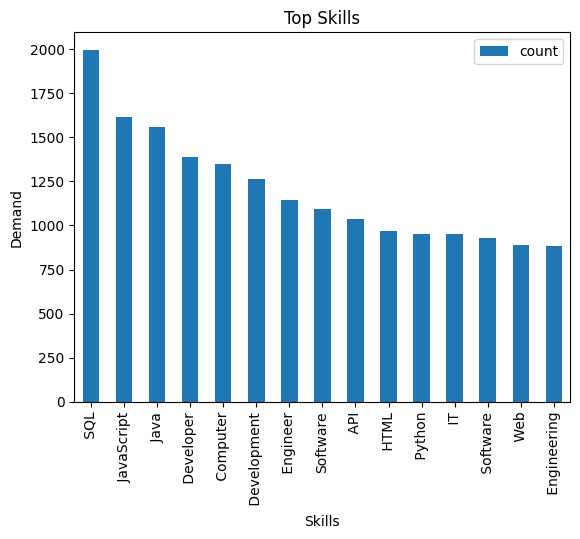

In [61]:
top_skills.plot(kind='bar')
plt.title('Top Skills')
plt.xlabel('Skills')
plt.ylabel('Demand')
plt.show()